# Ramp Relaxation Test Analysis 
28/04/25 - Fraser Shields 

This script loops through csv files created by TA 5500 when performing mechanical tests and plots the relevant stress vs time, strain vs time, and stress vs strain plots. Ramp, relaxation and dynamics moduli are extracted from the data, alongside peak stress and relaxation time. 

## Extract and Plot

In [82]:
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.pyplot import subplots

import seaborn as sns

import pathlib
from pathlib import Path

import math

import scipy
from scipy.signal import savgol_filter

36.2


Text(0.5, 0, 'Time (s)')

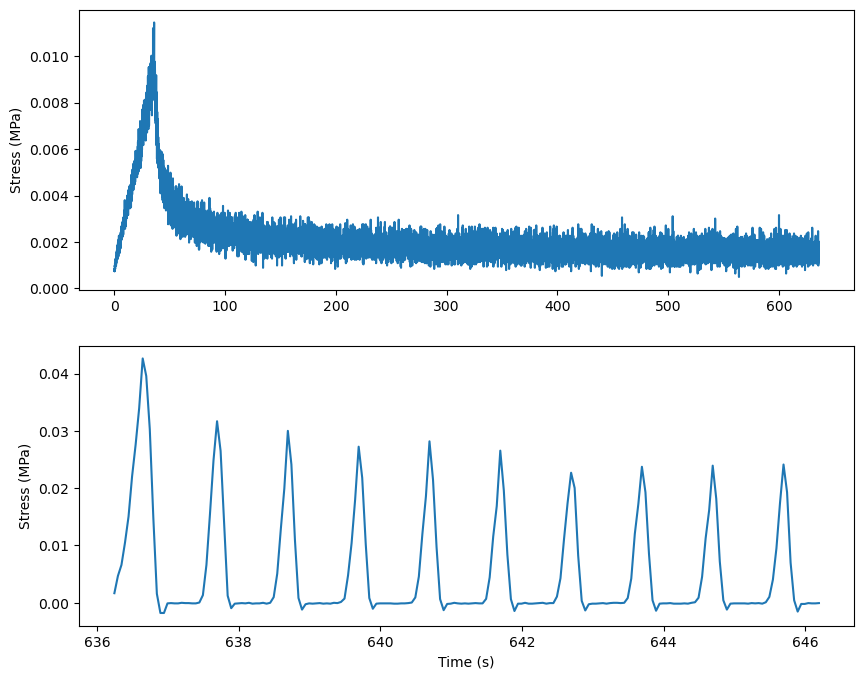

In [ ]:
folder_path = r'C:\Users\mbgm4fs3\OneDrive - The University of Manchester\PhD\Experimental\Data\5. Mechanical Stimulation\Primary\Mechanical testing\raw_data'
file_path = Path(folder_path) / filename

# extract df from csv file
raw_df = pd.read_csv(file_path, skiprows=48, usecols=range(1,4))

# drop row containing units
raw_df = raw_df.drop(0)

# reset index after dropping
raw_df = raw_df.reset_index(drop=True)

# convert data to float 
raw_df = raw_df.astype(float)

# define sample dimensions
thickness = 1.81 # mm
diameter = 5.08 # mm
area = math.pi * (diameter / 2)**2 

# calculate stress and strain 
raw_df['Stress'] = - raw_df['Load 3'] / area
raw_df['Strain'] = - raw_df['Disp'] / thickness

# split ramp relaxation and dynamic data
# first need to calculate relaxation and dynamic start times
strain_rate = 0.01 # mm/s 
t_relax = (thickness * 0.2) / strain_rate
t_dyn = t_relax + 600

print(t_relax)


# create filtered df with ramp-relaxation and dynamic data
ramp_rel_df = raw_df[(raw_df['Elapsed Time'] <= t_dyn)].copy()

dyn_df = raw_df[(raw_df['Elapsed Time'] >= t_dyn) & (raw_df['Elapsed Time'] <= t_dyn + 10)].copy()

# plot seperated portions of data
fig, axs = subplots(nrows=2, ncols=1, figsize=(10, 8))

axs[0].plot(ramp_rel_df['Elapsed Time'], ramp_rel_df['Stress'])
axs[0].set_ylabel('Stress (MPa)')

axs[1].plot(dyn_df['Elapsed Time'], dyn_df['Stress'])
axs[1].set_ylabel('Stress (MPa)')
axs[1].set_xlabel('Time (s)')


Text(0.5, 0, 'Time (s)')

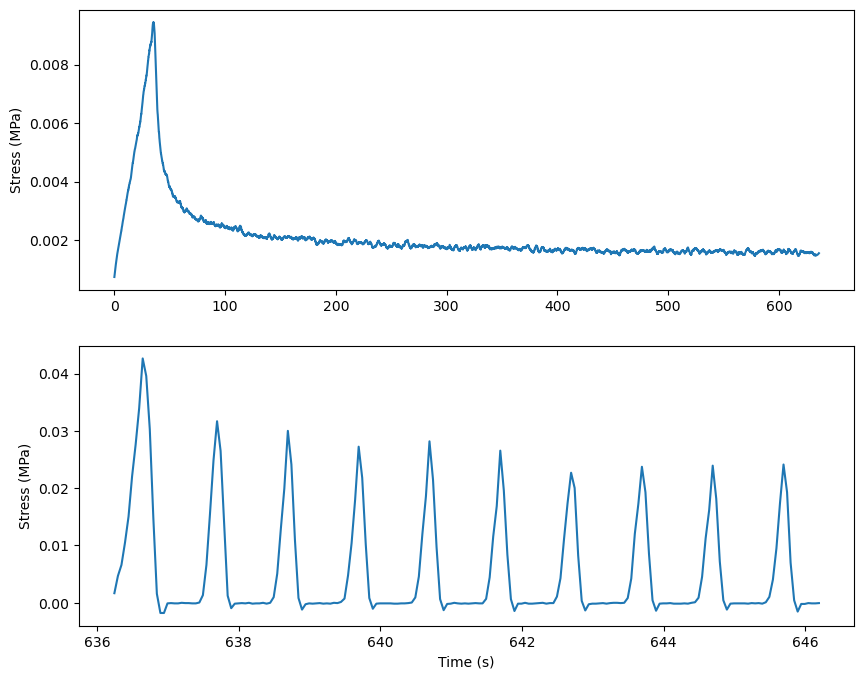

In [122]:
# smooth ramp data 
ramp_rel_df['Stress_smooth'] = savgol_filter(ramp_rel_df['Stress'], 100, 2)

# plot seperated portions of data
fig, axs = subplots(nrows=2, ncols=1, figsize=(10, 8))

axs[0].plot(ramp_rel_df['Elapsed Time'], ramp_rel_df['Stress_smooth'])
axs[0].set_ylabel('Stress (MPa)')

axs[1].plot(dyn_df['Elapsed Time'], dyn_df['Stress'])
axs[1].set_ylabel('Stress (MPa)')
axs[1].set_xlabel('Time (s)')

## Ramp Relaxation Phase Analysis

In [130]:
# find peak stress
peak_stress = max(ramp_rel_df['Stress'])

print(1000*peak_stress)


# find secant modulus from 5% to 15%
strain_low = 0.05
strain_high = 0.15

# find idx for above strains
idx_low = (ramp_rel_df['Strain'] - strain_low).abs().idxmin()
idx_high = (ramp_rel_df['Strain'] - strain_high).abs().idxmin()

# find corresponding stress values
stress_low = ramp_rel_df.loc[idx_low, 'Stress_smooth']
stress_high = ramp_rel_df.loc[idx_high, 'Stress_smooth']

# calculate secant modulus
secant_modulus = (stress_high - stress_low) / (strain_high - strain_low)


# calculate equilibrium modulus at strain=0.2
eq_stress = ramp_rel_df['Elapsed Time'] == t_dyn

print(eq_stress)



11.446446400061914
0        False
1        False
2        False
3        False
4        False
         ...  
12720    False
12721    False
12722    False
12723    False
12724    False
Name: Elapsed Time, Length: 12725, dtype: bool
